In [1]:
import requests as rq
from bs4 import BeautifulSoup
import pandas as pd
import re
%matplotlib inline


In [2]:
df_friends = pd.read_csv("df_friends.csv")
df_friends.head()

,Unnamed: 0,title,Character,Scripts,negative,positive
0,2,The One Where Monica Gets a New Roommate (The ...,Monica,There's nothing to tell! He's just some guy I...,0.000000,0.000000
1,3,The One Where Monica Gets a New Roommate (The ...,Joey,"C'mon, you're going out with the guy! There's...",0.333333,0.333333
2,4,The One Where Monica Gets a New Roommate (The ...,Chandler,"All right Joey, be nice. So does he have a h...",0.000000,1.000000
3,5,The One Where Monica Gets a New Roommate (The ...,Phoebe,"Wait, does he eat chalk?",0.000000,0.500000
4,7,The One Where Monica Gets a New Roommate (The ...,Phoebe,"Just, 'cause, I don't want her to go through ...",0.000000,0.142857


In [3]:
df_friends

,Unnamed: 0,title,Character,Scripts,negative,positive
0,2,The One Where Monica Gets a New Roommate (The ...,Monica,There's nothing to tell! He's just some guy I...,0.000000,0.000000
1,3,The One Where Monica Gets a New Roommate (The ...,Joey,"C'mon, you're going out with the guy! There's...",0.333333,0.333333
2,4,The One Where Monica Gets a New Roommate (The ...,Chandler,"All right Joey, be nice. So does he have a h...",0.000000,1.000000
3,5,The One Where Monica Gets a New Roommate (The ...,Phoebe,"Wait, does he eat chalk?",0.000000,0.500000
4,7,The One Where Monica Gets a New Roommate (The ...,Phoebe,"Just, 'cause, I don't want her to go through ...",0.000000,0.142857
5,8,The One Where Monica Gets a New Roommate (The ...,Monica,"Okay, everybody relax. This is not even a dat...",0.000000,0.000000
6,9,The One Where Monica Gets a New Roommate (The ...,Chandler,Sounds like a date to me.,0.000000,0.000000
7,11,The One Where Monica Gets a New Roommate (The ...,Chandler,"Alright, so I'm back in high school, I'm stan...",0.000000,0.000000
8,12,The One Where Monica Gets a New Roommate (The ...,All,"Oh, yeah. Had that dream.",0.000000,0.000000
9,13,The One Where Monica Gets a New Roommate (The ...,Chandler,"Then I look down, and I realize there's a pho...",0.000000,0.000000


In [25]:
filepath = "NRC-Emotion-Lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(df_friends['Scripts'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


In [7]:
negative_words = emolex_df[emolex_df.negative == 1]["word"]
negative_words.head()

2         abandon
3       abandoned
4     abandonment
13      abduction
14       aberrant
Name: word, dtype: object

In [8]:
df_friends["Scripts"] = df_friends["Scripts"].astype(str)

In [9]:
df_friends["negative"] = wordcount_df[negative_words].sum(axis=1)


In [10]:
positive_words = emolex_df[emolex_df.positive == 1]["word"]

df_friends["positive"] = wordcount_df[positive_words].sum(axis=1)



In [11]:
df_friends

,Unnamed: 0,title,Character,Scripts,negative,positive
0,2,The One Where Monica Gets a New Roommate (The ...,Monica,There's nothing to tell! He's just some guy I...,0.000000,0.000000
1,3,The One Where Monica Gets a New Roommate (The ...,Joey,"C'mon, you're going out with the guy! There's...",0.500000,0.000000
2,4,The One Where Monica Gets a New Roommate (The ...,Chandler,"All right Joey, be nice. So does he have a h...",0.000000,0.000000
3,5,The One Where Monica Gets a New Roommate (The ...,Phoebe,"Wait, does he eat chalk?",0.333333,0.333333
4,7,The One Where Monica Gets a New Roommate (The ...,Phoebe,"Just, 'cause, I don't want her to go through ...",0.000000,1.000000
5,8,The One Where Monica Gets a New Roommate (The ...,Monica,"Okay, everybody relax. This is not even a dat...",0.000000,0.500000
6,9,The One Where Monica Gets a New Roommate (The ...,Chandler,Sounds like a date to me.,0.000000,0.000000
7,11,The One Where Monica Gets a New Roommate (The ...,Chandler,"Alright, so I'm back in high school, I'm stan...",0.000000,0.142857
8,12,The One Where Monica Gets a New Roommate (The ...,All,"Oh, yeah. Had that dream.",0.000000,0.000000
9,13,The One Where Monica Gets a New Roommate (The ...,Chandler,"Then I look down, and I realize there's a pho...",0.000000,0.000000


In [12]:
# df_friends.to_csv("df_friends_sentiment_analysis.csv")

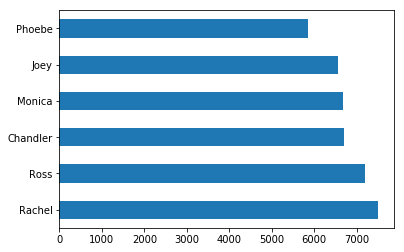

In [13]:
df_friends["Character"].value_counts().head(6).plot(kind = "barh")

In [14]:
url = "http://www.livesinabox.com/friends/1001.shtml"
response = rq.post(url)
doc = BeautifulSoup(response.text, "html.parser")


In [15]:
friends_numbers = [1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017]

In [16]:
friends_numbers = pd.DataFrame(friends_numbers)

In [17]:
friends_numbers.columns = ["number"]

In [18]:
friends_numbers["number"] = friends_numbers["number"].astype(str)

In [19]:
friends_numbers

,number
0,1001
1,1002
2,1003
3,1004
4,1005
5,1006
6,1007
7,1008
8,1009
9,1010


In [20]:
urls = "http://www.livesinabox.com/friends/" +friends_numbers["number"] + ".shtml"
urls

0     http://www.livesinabox.com/friends/1001.shtml
1     http://www.livesinabox.com/friends/1002.shtml
2     http://www.livesinabox.com/friends/1003.shtml
3     http://www.livesinabox.com/friends/1004.shtml
4     http://www.livesinabox.com/friends/1005.shtml
5     http://www.livesinabox.com/friends/1006.shtml
6     http://www.livesinabox.com/friends/1007.shtml
7     http://www.livesinabox.com/friends/1008.shtml
8     http://www.livesinabox.com/friends/1009.shtml
9     http://www.livesinabox.com/friends/1010.shtml
10    http://www.livesinabox.com/friends/1011.shtml
11    http://www.livesinabox.com/friends/1012.shtml
12    http://www.livesinabox.com/friends/1013.shtml
13    http://www.livesinabox.com/friends/1014.shtml
14    http://www.livesinabox.com/friends/1015.shtml
15    http://www.livesinabox.com/friends/1016.shtml
16    http://www.livesinabox.com/friends/1017.shtml
Name: number, dtype: object

In [63]:
list_episode_10 = []
list_title_10 = []
count = 0
for i in urls:
    response = rq.post(i)
    doc = BeautifulSoup(response.text, "html.parser")
    for title in doc.find_all("h3"):
        count += 1
        print(title.text, count)
        for scripts in doc.find_all("p")[4:-1]:
            print('-----')
            dictionary = {}
            dictionary["count"] = count
            dictionary["title"]  = title.text
            dictionary["scripts"]  = scripts.text
            list_episode_10.append(dictionary)
            print(scripts.text)
    


1001 - The One After Joey And Rachel 
                          Kiss 1
-----
[Scene: Barbados, Monica and Chandler's Room. They both enter from Ross's
  room. Monica still has her big, frizzy hair.]
-----
Monica: Oh, the way you crushed Mike at ping pong was such
  a turn-on.You wanna...? (plays with her finger on Chandlers chest)
-----
Chandler: You know, I'd love to, but I'm a little tired.
-----
Monica: I'll put a pillowcase over my head.
-----
Chandler: You're on!
-----
(they start to get ready, but then Phoebe enters through the door from Ross's
  room)
-----
Phoebe: Hey!
-----
Monica: What's up?
-----
Phoebe: Well, okay, Mike's taking a shower, which by the
  way there's  no law against. And then we're gonna grab some food, so if you
  want...
-----
(there's a door slamming in Ross's room, and some indistinct murmuring)
-----
Ross: ... finally...
-----
Phoebe: Is that Ross?
-----
Monica: Yeah, you can hear everything through these stupid
  walls.
-----
Phoebe: Sounds like he's wi

1005 - The One Where Rachel's Sister 
                            Babysits 2
-----
[Scene: Central Perk]
-----
 
-----
Rachel: 
                            You know, I'm thinking about letting Emma have her 
                            first cookie.
-----
Joey: Her first cookie? 
                            She has cookies all the time!
-----
Rachel: I've never 
                            given her a cookie. Have you?
-----
Joey: No! No... and, 
                            for the record, I've also never given her a frosting 
                            from a can!
-----
Monica: Hey Rach, the 
                            adoption agency needs letters of recommendation and 
                            we were wondering if you would write one for us.
-----
Rachel: Of course, 
                            I'd be honored!
-----
Chandler: Thanks!
-----
Monica: Thank you!
-----
(Joey looks at them, disappointed about 
                            their decision)
-----
Joey: U-U-Um, I think 
 

1006 - The One With Ross's Grant 3
-----
Written by: Sebastian Jones
                          Produced by: Robert Carlock and Wendy Knoller
                          Transcribed by: Cof fee Mug, Ele onora, Seba stiano 
                          & Vaness a 
                          Final check by Kim 
-----
--------------------------------------------------------------------------------
-----
Scene: Central Perk, everyone except Phoebe is there]
                          Phoebe: (she enters) Hey...
-----
All: Hey!
-----
Rachel: Hi!
-----
Ross: Pheebs, what's wrong?
-----
Phoebe: Oh, I'm just so exhausted from dragging around 
                          this... (she shows her ring)HUGE engagement ring!
-----
All: OH!
-----
Rachel: My God!
-----
Joey: Hey!
-----
Rachel: Congratulations! Wow!!
-----
Ross: So, did he get on one knee, did he have a speech 
                          prepared, or (in a tender way) did he cry? (the guys 
                          look at him) Yeah, big surpris

1007 - The One With The Home Study 4
-----
Written by: Mark Kunerth
                          Produced by: Robert Carlock and Wendy Knoller
                          Transcribed by: Coffee Mug, Eleonora, Sebastiano & 
                          Vanessa
                          Final check by Kim
-----

                          [Scene: Central Perk]
-----
(Joey and Ross enter. Phoebe and Mike are sitting on 
                          the couch, reading a magazine.)
-----
Ross: Hey you guys!
-----
Phoebe: Hey!
-----
Ross: Hey, what are you doing?
-----
Mike: Oh, figuring out our wedding plans.
-----
Chandler: That's funny, we were doing the same thing!
-----
Ross: Yeah!
-----
Phoebe: It's really crazy! The hall, the dress, the 
                          food... I-I had no idea how expensive this stuff was!
-----
Chandler: Yeah it is really pricey. I mean, I freaked 
                          when I first heard the numbers.
-----
Phoebe: So what did you two do about it?
-----
Chandler: I

1008 - The One With The Late Thanksgiving 5
-----
Written by: Shana Goldberg-Meehan 
                          Produced by: Robert Carlock & Wendy Knoller 
                          Transcribed by: Coffee Mug, Eleonora, Sebastiano & 
                          Vanessa
                          Final check by Kim
-----

                          [Scene: Central Perk. Monica and Chandler enter, the 
                          others are sitting on the couch.]
-----
Monica: Hey guys!
-----
Rachel: Hi! 
-----
Phoebe: Hey!
-----
Monica: We need to talk to you about something.
-----
Chandler: Yeah. We don't feel like we can host Thanksgiving 
                          this year.
-----
All: What?
-----
Phoebe: Hey!
-----
Ross: Are you kidding?
-----
Chandler: Well, it's just with uhm, work and the stress 
                          of adoption, we just don't feel like we have the energy. 
                          Plus, we don't think it's fair that every year the burden 
                       

1009 - The One With the Birth Mother 6
-----
Written by: Scott Silveri
                          Produced by: Robert Carlock and Wendy Knoller
                          Transcribed by: Coffee Mug, Eleonora, Sebastiano & 
                          Vanessa
                          Final check by Kim
-----

                          [Scene: Central Perk. Everyone's sitting on the couch.Monica 
                          and Chandler enter]
-----
Chandler: Hi!
-----
Ross: Hey!
-----
Monica: Hey!
-----
Chandler: We're just here to say goodbye, we're off 
                          to Ohio.
-----
Phoebe: Oh, right! Your adoption interview!
-----
Monica: Yep, we're gonna meet the lady who could be 
                          carrying our baby.
-----
Joey: I can't believe it. When you guys come back, 
                          you're gonna have a baby! That is so weird!
-----
Chandler: And so incorrect!
-----
Monica: She's only a couple of months pregnant. She 
                          liked ou

1010 - The One Where Chandler Gets 
                          Caught 7
-----
Written by: Doty Abrams
                          Produced by: Wendy Knoller
                          Transcribed by: Coffee Mug, Eleonora, Sebastiano & 
                          Vanessa
                          Flashback clips transcribed by: Guineapig, Dan Silverstein, 
                          Ruth Curran, Eric Aasen and Mindy Mattingly Phillips, 
                          and compiled by Eleonora.
                          Final check by Kim
-----

                          [Scene: Central Perk. Everybody's sitting on the couch 
                          and Monica is eating a chunk of cake.]
                          Monica: (really excited) Mmh... this cake is amazing!
-----
Rachel: My God, get a room!
-----
Monica: I would get a room with this cake. I think 
                          I could show this cake a good time!
-----
Phoebe: If you had to, what would you give up, food 
                      

1011 - The One Where the Stripper Cries 8
-----
Written by: Marta Kauffman & David Crane
                          Produced by: Robert Carlock & Wendy Knoller
                          Transcribed by: Coffee Mug, Eleonora, Sebastiano & 
                          Vanessa
                          Final check by Kim
-----

                          --------------------------------------------------------------------------------
-----
[Scene: Central Perk. Everyone's sitting on the couch. 
                          Monica and Joey enter.]
                          Joey: Hey guys!
-----
Monica: Hey, let me tell them!
-----
Joey: Sure.
-----
Monica: Joey is gonna be a celebrity guest on a game 
                          show!
-----
Phoebe: Great!
-----
Ross: Really? Which one?
-----
Monica: (stopping Joey from answering) Ohh! Fish, seaweed, 
                          a sunken ship.
-----
Ross: Things you find in the ocean, (to Joey) You're 
                          gonna be on "Pyramid"!!


1012 - The One With Phoebe's Wedding 9
-----
Written by: Robert Carlock & Dana Klein 
                          Produced by: Robert Carlock & Wendy Knoller 
                          Transcribed by: Coffee Mug, Eleonora, Sebastiano & 
                          Vanessa
-----

                          --------------------------------------------------------------------------------
-----
[Scene: Central Perk. Joey's sitting on the couch and 
                          Phoebe enters.]
                          Phoebe: Oh, hey Joey.
-----
Joey: Uh, hey.
-----
Phoebe: Listen, I need to ask you something. Ok, you 
                          know how my step dad's in prison.
-----
Joey: (afraid) Yeah.
-----
Phoebe: Yeah. Well, uhm... listen he was supposed to 
                          get a weekend furlough, so he'd come to the wedding 
                          tomorrow, but he just called and... uhm... well, apparently 
                          stabbing Iceman in the exercise yard just coul

1013 - The One Where Joey Speaks French 10
-----
Written by: Sherry Bilding-Graham & Ellen Plummer 
                          
                          Produced by: Robert Carlock & Wendy Knoller
                          Transcribed by: Coffee Mug, Eleonora, Sebastiano & 
                          Vanessa
-----

                          --------------------------------------------------------------------------------
-----
[Scene: Central Perk. Everyone's sitting on the couch 
                          and Phoebe enters.]
                          Phoebe: Hi
-----
All: Hey! Hi!
-----
Rachel: How was the honeymoon?
-----
Phoebe; Oh, incredible! Oh! Champagne, candle-lit dinners, 
                          moonlight walks on the beach, it was sooo ro-man-tic!
-----
Rachel: Oh!
-----
Chandler: So, where's Mike?
-----
Phoebe: Oh, he's at the doctor, he didn't poop the 
                          whole time we were there!
-----
Joey: Well anyway, I'm glad you're back, I really need 
      

1014 - The One With Princess Consuela 11
-----
Teleplay by: Tracy Reilly 
                          Story by: Robert Carlock 
                          Produced by: Robert Carlock & Wendy Knoller
                          Transcribed by: Coffee Mug, Eleonora, Sebastiano & 
                          Vanessa
                          Final check by Kim
-----

                          [Scene: Chandler and Monica's apartment. They are having 
                          a diner party with Phoebe and Mike.] 
-----
Mike: (raising his glass) Thank you guys for having 
                          us over.
-----
Phoebe: Oh! Yeah, this is fun, couples night.
-----
Chandler: Yeah, I don't know why we hang out with married 
                          couples more often.
-----
Monica: Well, because every time we do, you make jokes 
                          about swinging and scare them away.
-----
Chandler: You mean that Portuguese couple? Yeah, like 
                          you wouldn't have done i

1015 - The One Where Estelle Dies  12
-----
[Flashback scene from last week, Monica and Chandler's kitchen, 
  Rachel, Ross, Monica and Chandler are there.]
-----
Jennifer: Previously on Friends...
-----
Chandler: How did the job stuff go?
-----
Rachel: He offered me one.
-----
Ross: (gasps) You know what? This calls for a bottle of Israels finest.
-----
Rachel: The job is in Paris. (we see Ross stare in disbelief)
-----

FADE OUT
-----
Rachel: Oh, God! Please, somebody  say something.
-----
Ross: So if you take this job you'll be moving to Paris?
-----
Chandler: Or facing a bitch of a commute.
-----
Rachel: I know, it's huge, and it's scary, and it's... really far, far away 
  from you guys, but this is such an incredible opportunity for me. And I've already 
  talked to them about our situation with Emma, and they said they'll do whatever 
  we need to make us feel comfortable.
-----
Ross: Okay.
-----
Rachel: I mean, I'll fly back and forth, they'll fly you out... 
  Anything we want

Friends 
                          1016 - The One With Rachel's Going Away Party  13
-----
[Scene: Joey's place. Rachel and Joey 
                          are talking]
-----
Joey: All right, all right, all right, 
                          let's play one more time, ok? And remember, if I win 
                          you do not move to Paris.
-----
Rachel: Ok! Can't believe I'm risking 
                          this again, but you're on! All right Joe, you remember 
                          the rules! Heads I win, tails you lose.
-----
Joey: Just flip!
-----
Rachel (she flips the coin): Ha, tails!
-----
Joey: Damnit!
-----
(Chandler and Monica enter the room)
-----
Chandler: Hey!
-----
Joey: Hey!
-----
Chandler: So we thought we'd throw 
                          you little going away party around seven.
-----
Rachel: Oh, that sounds good!
-----
Monica: Hey, Rach, you're leaving 
                          tomorrow, shouldn't you be packing?
-----
Rachel: It's all done!
-----
Monica

1017/1018 - The Last One 15
-----
[Scene: Monica and Chandler's apartment. It's a scene from 1016 TOW
Rachel's Going Away Party.]
-----
Jennifer Aniston (V.O.): Previously on Friends.
-----
Monica: Erica, are you okay?
-----
Erica: Yeah, you know, maybe I ate too much. I keep getting these 
  stomach-aches. They come and go like every few minutes.
-----
Monica: Oh my God!
-----
Chandler: Relax! We'll just get her some antacids.
-----
Monica: She doesn't have a stomach-ache. She's in labor!
-----
Chandler: Oh my God!
-----
 
-----
[Cut to Ross's apartment. Ross and Rachel are there. It's another 
  scene from 1016 TOW Rachel's Going Away Party.]
-----
Rachel: So if you think I didn't say goodbye to you because you don't 
  mean as much to me as everybody else, you're wrong. It's because you 
  mean more to me.
-----
Ross: Rach!
-----
Rachel: What?!
-----
(He walks over and kisses her. They pull back, Rachel looks at him, 
and they kiss again.)
-----
 
-----
[Scene: Ross's bedroom. Rache

-----
Joey: Has it always been purple?
-----
Chandler: (to his children) Look around, you guys. This was your first 
  home. And it was a happy place, filled with love and laughter. But 
  more important, because of rent control, it was a friggin' steal!
-----
(Monica and Chandler put Jack and Erica in their stroller.)
-----
Phoebe: Hey, do you realise that at one time or another we all lived 
  in this apartment?
-----
Monica: Oh, yeah, that's true.
-----
Ross: Uh, I haven't.
-----
Monica: Wait a minute. What about that summer during college that you 
  lived with grandma, and you tried to make it as a dancer?
-----
Ross: Do you realise we almost made it ten years without that coming 
  up?
-----
Monica: Oh, honey, I forgot. I promised Treeger that we'd leave our 
  keys.
-----
Chandler: Oh, okay.
-----
(Chandler and Monica walk over to the kitchen-counter and leave their 
  keys. Then the other four pick out their keys and leave them as well.)
-----
Phoebe: So, I guess this is it.
--

In [64]:
Season_10 = pd.DataFrame(list_episode_10)

In [66]:
Season_10

,count,scripts,title
0,1,"[Scene: Barbados, Monica and Chandler's Room. ...",1001 - The One After Joey And Rachel \n ...
1,1,"Monica: Oh, the way you crushed Mike at ping p...",1001 - The One After Joey And Rachel \n ...
2,1,"Chandler: You know, I'd love to, but I'm a lit...",1001 - The One After Joey And Rachel \n ...
3,1,Monica: I'll put a pillowcase over my head.,1001 - The One After Joey And Rachel \n ...
4,1,Chandler: You're on!,1001 - The One After Joey And Rachel \n ...
5,1,"(they start to get ready, but then Phoebe ente...",1001 - The One After Joey And Rachel \n ...
6,1,Phoebe: Hey!,1001 - The One After Joey And Rachel \n ...
7,1,Monica: What's up?,1001 - The One After Joey And Rachel \n ...
8,1,"Phoebe: Well, okay, Mike's taking a shower, wh...",1001 - The One After Joey And Rachel \n ...
9,1,"(there's a door slamming in Ross's room, and s...",1001 - The One After Joey And Rachel \n ...


In [24]:
Season_10["Characters"] = Season_10["scripts"].str.split(":", 1, expand = True)[0] 
Season_10["scripts"] = Season_10["scripts"].str.split(":", 1, expand = True)[1]


In [26]:
Season_10.dropna(inplace = True)

In [27]:
Season_10 = Season_10[Season_10["Characters"] != "[Scene"]

In [28]:
Season_10 = Season_10[Season_10["Characters"] != "Written by"]

In [29]:
Season_10["scripts"] = Season_10["scripts"].str.replace("\n", " ")

In [30]:
Season_10["title"] = Season_10["title"].str.replace("\n", " ")

In [31]:
Season_10

,scripts,title,Characters
1,"Oh, the way you crushed Mike at ping pong was...",1001 - The One After Joey And Rachel ...,Monica
2,"You know, I'd love to, but I'm a little tired.",1001 - The One After Joey And Rachel ...,Chandler
3,I'll put a pillowcase over my head.,1001 - The One After Joey And Rachel ...,Monica
4,You're on!,1001 - The One After Joey And Rachel ...,Chandler
6,Hey!,1001 - The One After Joey And Rachel ...,Phoebe
7,What's up?,1001 - The One After Joey And Rachel ...,Monica
8,"Well, okay, Mike's taking a shower, which by ...",1001 - The One After Joey And Rachel ...,Phoebe
10,... finally...,1001 - The One After Joey And Rachel ...,Ross
11,Is that Ross?,1001 - The One After Joey And Rachel ...,Phoebe
12,"Yeah, you can hear everything through these s...",1001 - The One After Joey And Rachel ...,Monica


In [32]:
df_friends.head()

,Unnamed: 0,title,Character,Scripts,negative,positive
0,2,The One Where Monica Gets a New Roommate (The ...,Monica,There's nothing to tell! He's just some guy I...,0.000000,0.000000
1,3,The One Where Monica Gets a New Roommate (The ...,Joey,"C'mon, you're going out with the guy! There's...",0.500000,0.000000
2,4,The One Where Monica Gets a New Roommate (The ...,Chandler,"All right Joey, be nice. So does he have a h...",0.000000,0.000000
3,5,The One Where Monica Gets a New Roommate (The ...,Phoebe,"Wait, does he eat chalk?",0.333333,0.333333
4,7,The One Where Monica Gets a New Roommate (The ...,Phoebe,"Just, 'cause, I don't want her to go through ...",0.000000,1.000000


In [33]:
Season_10.head()

,scripts,title,Characters
1,"Oh, the way you crushed Mike at ping pong was...",1001 - The One After Joey And Rachel ...,Monica
2,"You know, I'd love to, but I'm a little tired.",1001 - The One After Joey And Rachel ...,Chandler
3,I'll put a pillowcase over my head.,1001 - The One After Joey And Rachel ...,Monica
4,You're on!,1001 - The One After Joey And Rachel ...,Chandler
6,Hey!,1001 - The One After Joey And Rachel ...,Phoebe


In [35]:
df_friends = df_friends.drop('Unnamed: 0', 1)


In [40]:
df_friends = df_friends.drop('negative', 1)
df_friends = df_friends.drop('positive', 1)


In [37]:
Season_10.columns = ["Scripts", "title", "Character"]

In [42]:
df_friends_merged = df_friends.append(Season_10, ignore_index=True)

In [43]:
df_friends_merged.head()

,Character,Scripts,title
0,Monica,There's nothing to tell! He's just some guy I...,The One Where Monica Gets a New Roommate (The ...
1,Joey,"C'mon, you're going out with the guy! There's...",The One Where Monica Gets a New Roommate (The ...
2,Chandler,"All right Joey, be nice. So does he have a h...",The One Where Monica Gets a New Roommate (The ...
3,Phoebe,"Wait, does he eat chalk?",The One Where Monica Gets a New Roommate (The ...
4,Phoebe,"Just, 'cause, I don't want her to go through ...",The One Where Monica Gets a New Roommate (The ...


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(df_friends_merged['Scripts'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
negative_words = emolex_df[emolex_df.negative == 1]["word"]
negative_words.head()

2         abandon
3       abandoned
4     abandonment
13      abduction
14       aberrant
Name: word, dtype: object

In [46]:
df_friends_merged["negative"] = wordcount_df[negative_words].sum(axis=1)
positive_words = emolex_df[emolex_df.positive == 1]["word"]

df_friends_merged["positive"] = wordcount_df[positive_words].sum(axis=1)



In [47]:
df_friends_merged.head()

,Character,Scripts,title,negative,positive
0,Monica,There's nothing to tell! He's just some guy I...,The One Where Monica Gets a New Roommate (The ...,0.000000,0.000000
1,Joey,"C'mon, you're going out with the guy! There's...",The One Where Monica Gets a New Roommate (The ...,0.500000,0.000000
2,Chandler,"All right Joey, be nice. So does he have a h...",The One Where Monica Gets a New Roommate (The ...,0.000000,0.000000
3,Phoebe,"Wait, does he eat chalk?",The One Where Monica Gets a New Roommate (The ...,0.333333,0.333333
4,Phoebe,"Just, 'cause, I don't want her to go through ...",The One Where Monica Gets a New Roommate (The ...,0.000000,1.000000


In [54]:
df_friends_merged

,Character,Scripts,title,negative,positive
0,Monica,There's nothing to tell! He's just some guy I...,The One Where Monica Gets a New Roommate (The ...,0.000000,0.000000
1,Joey,"C'mon, you're going out with the guy! There's...",The One Where Monica Gets a New Roommate (The ...,0.500000,0.000000
2,Chandler,"All right Joey, be nice. So does he have a h...",The One Where Monica Gets a New Roommate (The ...,0.000000,0.000000
3,Phoebe,"Wait, does he eat chalk?",The One Where Monica Gets a New Roommate (The ...,0.333333,0.333333
4,Phoebe,"Just, 'cause, I don't want her to go through ...",The One Where Monica Gets a New Roommate (The ...,0.000000,1.000000
5,Monica,"Okay, everybody relax. This is not even a dat...",The One Where Monica Gets a New Roommate (The ...,0.000000,0.500000
6,Chandler,Sounds like a date to me.,The One Where Monica Gets a New Roommate (The ...,0.000000,0.000000
7,Chandler,"Alright, so I'm back in high school, I'm stan...",The One Where Monica Gets a New Roommate (The ...,0.000000,0.142857
8,All,"Oh, yeah. Had that dream.",The One Where Monica Gets a New Roommate (The ...,0.000000,0.000000
9,Chandler,"Then I look down, and I realize there's a pho...",The One Where Monica Gets a New Roommate (The ...,0.000000,0.000000


In [51]:
df_friends_merged["Character"].value_counts().head(6)

Rachel      8197
Ross        7965
Chandler    7318
Monica      7300
Joey        7181
Phoebe      6459
Name: Character, dtype: int64

In [67]:
df_friends_merged.to_csv("Friends_complete.csv")

In [56]:
episode_names = df_friends_merged["title"].value_counts().reset_index()

In [58]:
episode_names = pd.DataFrame(episode_names)

In [71]:
df_friends_merged["title"].unique()

array(['The One Where Monica Gets a New Roommate (The Pilot-The Uncut Version)',
       'The One With the Sonogram at the End', 'The One With the Thumb',
       'The One With George Stephanopoulos',
       'The One With the East German Laundry Detergent',
       'The One With the Butt', 'The One With the Blackout',
       'The One Where Nana Dies Twice', 'The One Where Underdog Gets Away',
       'The One With the Monkey', 'The One With Mrs. Bing',
       'The One With the Dozen Lasagnas', 'The One With the Boobies',
       'The One With the Candy Hearts', 'The One With the Stoned Guy',
       'The One With Two Parts, part 1', 'The One With Two Parts, Part 2',
       'The One With All The Poker', 'The One Where the Monkey Gets Away',
       'The One With the Evil Orthodontist',
       'The One With The Fake Monica', 'The One With the Ick Factor',
       'The One With the Birth', 'The One Where Rachel Finds Out',
       "The One With Ross' New Girlfriend", 'The One With the Breast Milk'

In [3]:
Friends = pd.read_csv("Friends.csv")

In [4]:
Friends.drop("Unnamed: 0", 1, inplace = True)

In [79]:
Friends["title"].value_counts()

Friends 923 - 924 - The one in Barbados                                   1196
1017/1018 - The Last One                                                   846
The One With The Proposal                                                  554
The One That Could Have Been                                               543
The One Where Rachel Has A Baby                                            528
The One In Vegas                                                           524
The One With Chandler and Monicaâ€™s Wedding                               512
The One With Rossâ€™s Wedding Parts I and II                               490
The One With The Truth About London                                        360
1001 - The One After Joey And Rachel Kiss                                  346
The One With Joey's Big Break                                              337
1005 - The One Where Rachel's Sister Babysits                              334
The One With A Chick. And A Duck                    

In [144]:
Friends.head()

,Character,Scripts,title,negative,positive,Episode Number
0,Monica,There's nothing to tell! He's just some guy I ...,The One Where Monica Gets a New Roommate (The ...,0.000000,0.000000,1
1,Joey,"C'mon, you're going out with the guy! There's ...",The One Where Monica Gets a New Roommate (The ...,0.500000,0.000000,1
2,Chandler,"All right Joey, be nice.Â So does he have a hu...",The One Where Monica Gets a New Roommate (The ...,0.000000,0.000000,1
3,Phoebe,"Wait, does he eat chalk?",The One Where Monica Gets a New Roommate (The ...,0.333333,0.333333,1
4,Phoebe,"Just, 'cause, I don't want her to go through w...",The One Where Monica Gets a New Roommate (The ...,0.000000,1.000000,1


In [25]:
urls_missed = ["http://www.livesinabox.com/friends/season2/215rryk.htm", "http://www.livesinabox.com/friends/season2/209towpd.htm", "http://www.livesinabox.com/friends/season2/224bamw.htm", "http://www.livesinabox.com/friends/season2/212toasb.htm", "http://www.livesinabox.com/friends/season2/220oyd.htm", "http://www.livesinabox.com/friends/season2/216jmo.htm", "http://www.livesinabox.com/friends/season2/217emi.htm", "http://www.livesinabox.com/friends/season2/214towpv.htm"]


In [73]:
for i in urls_missed:
    print(i)

http://www.livesinabox.com/friends/season2/215rryk.htm
http://www.livesinabox.com/friends/season2/209towpd.htm
http://www.livesinabox.com/friends/season2/224bamw.htm
http://www.livesinabox.com/friends/season2/212toasb.htm
http://www.livesinabox.com/friends/season2/220oyd.htm
http://www.livesinabox.com/friends/season2/216jmo.htm
http://www.livesinabox.com/friends/season2/217emi.htm
http://www.livesinabox.com/friends/season2/214towpv.htm


In [155]:
list_ep = []

for i in urls_missed:
    response = rq.post(i)
    doc = BeautifulSoup(response.text, "html.parser")
    for title in doc.find_all("h1"):
        print(title.text)
        for script in doc.find_all("p"):
            list_1 =script.text.split("\n\n")
            for m in list_1:
                dictionary_missed = {}
                dictionary_missed["title"]  = title.text
                dictionary_missed["scripts"]  = m.split("\n")
                list_ep.append(dictionary_missed)
                print(m.split("\n"))

The One Where Rachel and Ross... You Know
['']
["[Scene: Chandler and Joey's apartment. Joey and Chandler enter with", 'Chandler covering his eyes and Joey leading him.]']
['JOEY: Alright, no peeking. No peeking, no peeking, no peeking.']
['CHANDLER: Alright, alright, but you better be wearing clothes when I open my eyes.']
['JOEY: Alright open your eyes. [opens his eyes to see two black leather recliners and a big', 'screen TV]']
['CHANDLER: Sweet mother of all that is good and pure.']
['JOEY: Huh? Days of our Lives picked up my option.']
['CHANDLER: Congratulations!']
['JOEY: I know.']
['chandler: Now we can finally watch Green Acres the way it was meant to be', 'seen.']
['JOEY: Uh-huh.']
['CHANDLER: So uh, which one is mine?']
['JOEY: Whichever one you want, man. Whichever one you want. [Chandler starts to sit in one', 'of the chairs] Not that one.']
['CHANDLER: [sits down] Ohh yes.']
["JOEY: [sits down] Ohh yeah, that's the stuff."]
['CHANDLER: [reaches for the footrest lever] Do w

['RACHEL: Phoebe, I thought your dad was in prison.']
["PHOEBE: No, that's my stepdad. My real dad's the one that ran out on us before I was born."]
['RACHEL: How have you never been on Oprah?']
['PHOEBE: [showing her pictures] OK, look, see, this is him. My mother gave me this picture', 'before she died, same guy.']
['MONICA: Honey, uh, this is a picture of the frame guy posing in front of a bright blue', 'screen with a collie.']
["PHOEBE: It's not a blue screen... it's just, maybe it was just really clear that day. OK,", 'I have to talk to my grandmother. [turns to leave]']
['MONICA: Oh, wait a minute honey.']
['GANG: Phoebs. [Phoebe leaves]']
['MONICA: Wow.']
["JOEY: So anyway, I'm trying to get my boss's ex-wife to sleep with me. . ."]
['GANG: Joey!']
["JOEY: Oh, but when Phoebe has a problem, everyone's all ears!"]
["[Scene: Phoebe's grandmother's place. Phoebe's grandmother is sitting at the table,", 'reading the obituaries, and crossing out names in the phonebook.]']
['GRANDMOTH

The One With Barry and Mindy's Wedding
['Story by: Ira Ungerleider', 'Teleplay by: Brown Mandell', 'Transcribed by: Eric Aasen']
['[Scene: Central Perk, the whole gang is there as Joey enters]']
["RACHEL: Hey Joey, how'd the audition go?"]
["JOEY: Incredible! I met the director this time and you'll never believe who it was."]
['ALL: Who?']
["JOEY: All right. I'll give you one hint. Warren Beatty."]
['ALL: Wow!']
["JOEY: Yeah, there's just one thing that might be kind've a problem. See, I, uh, had to", 'kiss this guy.']
["CHANDLER: 'Cause he was just so darn cute."]
["JOEY: No, as part of the audition. See, I'm up for this part of this guy, who the main guy", 'kisses.']
["ROSS: Well, hey. You're an actor, I say you just suck it up and do it. (Rachel looks at", 'him in disbelief) Or you just do it.']
["JOEY: I did do it, I'm a professional."]
["MONICA: Then what's the problem?"]
["JOEY: See after the scene, Mr. Beatty comes up to me and says 'good actor, bad kisser'.", "Can you believe t

The One After the Superbowl
['']
['[Scene: In a TV commercial that the gang is watching at Monica and', "Rachel's.]"]
['[A guy is sitting at his desk and his boss comes in and drops a huge pile of papers on', 'his desk. The guy looks dejected.]']
["COMMERCIAL VOICEOVER: Can't get the monkey off your back? Then put it in your mouth..."]
['[A monkey jumps on the desk and hands the guy a beer. He opens the beer and is suddenly on', 'the beach, in a hammock, with beautiful women all around.]']
['COMMERCIAL VOICEOVER: ...With MonkeyShine Beer. [MonkeyShine theme] MonkeyShine Beer,', "'cause it's a jungle out there.]"]
['[Camera pans back from the TV to show the gang watching.]']
['ROSS: That commercial always makes me so sad.']
['JOEY: Yeah, but then the guy opens his beer and those girls run at him, so, everything', 'seems to work out OK.']
['ROSS: I meant because the monkey in it reminds me of Marcel.']
["PHOEBE: I can see that, 'cause they both have those big brown eyes and, ya know, the

The One Where Old Yeller Dies
['']
["[Scene: Monica and Rachel's apartment. Phoebe enters to see Monica,", 'Richard, Ross, and Rachel tearfully watching TV.]']
['END']
['']
The One Where Joey Moves Out
['']
["[Scene: Chandler and Joey's apartment. Chandler and Joey are sitting at", 'the bar, in their bathrobes, eating cereal]']
["JOEY: Man this is weird. You ever realize Captain Crunch's eyebrows are actually on his", 'hat?']
["CHANDLER: That's what's weird? Joey, the man's been captain of a cereal for the", 'last 40 years.']
['[Joey finishes his cereal, licks his spoon, and puts it back in the silverware drawer.]']
['CHANDLER: Waaa-aaah.']
['JOEY: What?']
['CHANDLER: The spoon. You licked and-and you put. You licked and you put.']
['JOEY: Yeah, so.']
["CHANDLER: Well don't you see how gross that is? I mean that's like you using my", 'toothbrush. [Joey gets a sheepish look] You used my toothbrush?']
["JOEY: Well, that was only 'cause I used the red one to unclog the drain."]
['CHANDLER

["RACHEL: You didn't get it?"]
['PHOEBE: No.']
["RACHEL: Why didn't you get it?"]
["PHOEBE: I'm sorry, I'm sorry."]
['RACHEL: Phoebe, how would you do this to me? This was all your idea.']
['PHOEBE: I know, I know, and I was gonna get it but then he came in with this needle and', 'uh, di-, did you know they do this with needles?']
["RACHEL: Really? You don't say, because mine was licked on by kittens."]
["[Scene: Chandler and Joey's apartment. Chandler is at the bar and Joey enters.]"]
['JOEY: Hey.']
['CHANDLER: Hey.']
["JOEY: Hey listen, I'm sorry about what happened. . ."]
['CHANDLER: Yeah me too.']
['JOEY: I know. Yeah.']
['CHANDLER: Yeah. So do we need to hug here or. . .']
["JOEY: No, we're alright."]
['CHANDLER: So I got ya something. [tosses Joey a bag of plastic spoons]']
['JOEY: Plastic spoons. Great.']
['CHANDLER: Lick away my man.']
["JOEY: These'll go great in my new place. You know, 'till I get real ones."]
['CHANDLER: What?']
["JOEY: Well, I can't use these forever. I mea

['PHOEBE: Oh, some guy she met at the movies.']
[' ROSS: Oh really? What uh, what does he want with her?']
["CHANDLER: Well, I'm guessing he wants to do a little dance. . . ya know, make a little", 'love. . . well pretty much get down tonight.']
["ROSS: [puts the message in the cupboard] I don't know, I don't get, I don't get it, I", "mean, wh, wh, two months ago Rachel and I were like, this close. Right now, what, I'm", 'takin messages from guys she, she meets at the movies? I mean this, this Casey should be', "takin' down my messages, ya know, or, or, Rachel and I should be together and, and we", 'should get some kind of me, message service.']
["PHOEBE: Hang in there, it's gonna happen."]
[' ROSS: Wha, OK, now how do you know that?']
["PHOEBE: Because she's your lobster."]
["CHANDLER: Oh, she's goin' somewhere."]
["PHOEBE: C'mon you guys. It's a known fact that lobsters fall in love and mate for life.", "You know what, you can actually see old lobster couples walkin' around their tan

In [169]:
df_friends_missed = pd.DataFrame(list_ep) 

In [171]:
df_friends_missed[df_friends_missed["title"] == "The One Where Old Yeller Dies"]

,scripts,title
1326,[],The One Where Old Yeller Dies
1327,[[Scene: Monica and Rachel's apartment. Phoebe...,The One Where Old Yeller Dies
1328,[END],The One Where Old Yeller Dies
1329,[],The One Where Old Yeller Dies


In [162]:
df_friends_missed["scripts"] = df_friends_missed["scripts"].astype(str).str.replace("[", "").str.replace("]", "")

In [163]:
df_friends_missed = df_friends_missed[df_friends_missed["scripts"] != "''"]

In [164]:
df_friends_missed["scripts"] = df_friends_missed["scripts"].str.replace("^'", "").str.replace("'$", "").str.replace('^"', "").str.replace('"$', "")

In [165]:
df_friends_missed["Character"] = df_friends_missed["scripts"].str.split(":", 1, expand = True)[0]
df_friends_missed["scripts"] = df_friends_missed["scripts"].str.split(":", 1, expand = True)[1]


In [112]:
df_friends_missed.dropna(inplace = True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [166]:
df_friends_missed = df_friends_missed[df_friends_missed["Character"] != "Scene"]
df_friends_missed = df_friends_missed[df_friends_missed["Character"] != "Written by"]

In [168]:
df_friends_missed[df_friends_missed["title"] == "The One Where Old Yeller Dies"]

,scripts,title,Character
1328,None,The One Where Old Yeller Dies,END


In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(df_friends_missed['Scripts'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
negative_words = emolex_df[emolex_df.negative == 1]["word"]
negative_words.head()

2         abandon
3       abandoned
4     abandonment
13      abduction
14       aberrant
Name: word, dtype: object

In [130]:
df_friends_missed["negative"] = wordcount_df[negative_words].sum(axis=1)
positive_words = emolex_df[emolex_df.positive == 1]["word"]

df_friends_missed["positive"] = wordcount_df[positive_words].sum(axis=1)


In [154]:
df_friends_missed[df_friends_missed["title"] == "The One Where Old Yeller Dies"]

,Scripts,title,Character,negative,positive


In [ ]:
df_friends_missed.columns = ["Scripts", "title", "Character"]

In [132]:
df_friends_missed.to_csv("Friends_missed")

In [134]:
friends_missed = pd.read_csv("Friends_missed")

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer

# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(friends_missed['Scripts'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
negative_words = emolex_df[emolex_df.negative == 1]["word"]
negative_words.head()

2         abandon
3       abandoned
4     abandonment
13      abduction
14       aberrant
Name: word, dtype: object

In [141]:
friends_missed["negative"] = wordcount_df[negative_words].sum(axis=1)
positive_words = emolex_df[emolex_df.positive == 1]["word"]

friends_missed["positive"] = wordcount_df[positive_words].sum(axis=1)


In [147]:
friends_missed = friends_missed.drop("Unnamed: 0", 1)


In [148]:
friends_missed

,Scripts,title,Character,negative,positive
0,"Alright, no peeking. No peeking, no peeking, ...",The One Where Rachel and Ross... You Know,JOEY,0.000000,0.000000
1,"Alright, alright, but you better be wearing c...",The One Where Rachel and Ross... You Know,CHANDLER,0.000000,0.000000
2,Alright open your eyes. opens his eyes to see...,The One Where Rachel and Ross... You Know,JOEY,0.200000,0.000000
3,Sweet mother of all that is good and pure.,The One Where Rachel and Ross... You Know,CHANDLER,0.333333,1.000000
4,Huh? Days of our Lives picked up my option.,The One Where Rachel and Ross... You Know,JOEY,0.000000,0.500000
5,Congratulations!,The One Where Rachel and Ross... You Know,CHANDLER,0.000000,0.000000
6,I know.,The One Where Rachel and Ross... You Know,JOEY,0.000000,0.000000
7,Now we can finally watch Green Acres the way ...,The One Where Rachel and Ross... You Know,chandler,0.000000,0.500000
8,Uh-huh.,The One Where Rachel and Ross... You Know,JOEY,0.000000,0.000000
9,"So uh, which one is mine?",The One Where Rachel and Ross... You Know,CHANDLER,0.000000,0.000000


In [150]:
Friends = Friends.append(friends_missed)

In [152]:
Friends.to_csv("Friends_finished.csv")

In [ ]:
friends_missed

In [30]:
df_friends_missed = pd.DataFrame(list_ep)

In [31]:
df_friends_missed

,scripts,title
0,[],The One Where Rachel and Ross... You Know
1,[[Scene: Chandler and Joey's apartment. Joey a...,The One Where Rachel and Ross... You Know
2,"[RACHEL: Just one cheek., ROSS: Nuh, uh, the m...",The One Where Rachel and Ross... You Know
3,"[ROSS: I've no idea, could be. Listen, I'm sor...",The One Where Rachel and Ross... You Know
4,[END],The One Where Rachel and Ross... You Know
5,[],The One Where Rachel and Ross... You Know


In [173]:
urs_missed_2 = "http://www.livesinabox.com/friends/season2/220oyd.htm"
response = rq.post(urs_missed_2)
doc = BeautifulSoup(response.text, "html.parser")


<html>
<head>
<title>The One Where Old Yeller Dies</title>
</head>
<body alink="yellow" bgcolor="white" link="green" text="black" vlink="black">
<h1 align="center">The One Where Old Yeller Dies</h1>
<hr align="center"/>
<font size="3"><i>
<p></p></i>Originally written by .</font><br/>
<font size="3">Transcribed by: </font><a href="josh.html">Josh Hodge</a><br/>
</body></html>


In [178]:
from selenium import webdriver
driver = webdriver.Chrome()
driver.get("http://www.livesinabox.com/friends/season2/220oyd.htm")

In [179]:
doc_1 = BeautifulSoup(driver.page_source, "html.parser")


In [189]:
list_missed_2 = []
for title in doc_1.find_all("h1"):
    print(title.text)
    for i in doc_1.find_all("p"):
        list_2= i.text.split("\n\n")
        for n in list_2:
            dict_1 = {}
            dict_1["Scripts"] = n.split("\n")
            dict_1["title"] = title.text
            list_missed_2.append(dict_1)
            print(n.split("\n"))

The One Where Old Yeller Dies
['Originally written by .', 'Transcribed by: Josh Hodge', '']
["[Scene: Monica and Rachel's apartment. Phoebe enters to see Monica,", 'Richard, Ross, and Rachel tearfully watching TV.]']
[' PHOEBE: Hey. Watcha guys doin?']
["RICHARD: Monica's making us watch Old Yeller."]
["PHOEBE: Why are you guys so upset? It's Old Yeller, it's a happy movie."]
['RACHEL: What?']
["ROSS: What're you talkin' about?"]
[" PHOEBE: C'mon, happy family gets a dog, frontier fun."]
['ROSS: Yeah but Phoebs, what about the end?']
["PHOEBE: What when Yeller saves saves the family from the wolf and everyone's happy?"]
[" RACHEL: That's not the end."]
["PHOEBE: Yu-huh. That's when my mother would shut off the TV and say 'The end'."]
['MONICA: What about the part where he has rabies?']
["PHOEBE: He doesn't have rabies, he has babies. That's what my mom said."]
["RICHARD: Uh, Phoebe, I don't think your mom would want you to see what's about to happen."]
[" PHOEBE: What, what's about to 

In [191]:
Old_Yeller = pd.DataFrame(list_missed_2)

In [192]:
Old_Yeller

,Scripts,title
0,"[Originally written by ., Transcribed by: Josh...",The One Where Old Yeller Dies
1,[[Scene: Monica and Rachel's apartment. Phoebe...,The One Where Old Yeller Dies
2,[ PHOEBE: Hey. Watcha guys doin?],The One Where Old Yeller Dies
3,[RICHARD: Monica's making us watch Old Yeller.],The One Where Old Yeller Dies
4,[PHOEBE: Why are you guys so upset? It's Old Y...,The One Where Old Yeller Dies
5,[RACHEL: What?],The One Where Old Yeller Dies
6,[ROSS: What're you talkin' about?],The One Where Old Yeller Dies
7,"[ PHOEBE: C'mon, happy family gets a dog, fron...",The One Where Old Yeller Dies
8,"[ROSS: Yeah but Phoebs, what about the end?]",The One Where Old Yeller Dies
9,[PHOEBE: What when Yeller saves saves the fami...,The One Where Old Yeller Dies


In [194]:
Old_Yeller["Scripts"] = Old_Yeller["Scripts"].astype(str).str.replace("[", "").str.replace("]", "")
Old_Yeller = Old_Yeller[Old_Yeller["Scripts"] != "''"]
Old_Yeller["Scripts"] = Old_Yeller["Scripts"].str.replace("^'", "").str.replace("'$", "").str.replace('^"', "").str.replace('"$', "")
Old_Yeller["Character"] = Old_Yeller["Scripts"].str.split(":", 1, expand = True)[0]
Old_Yeller["Scripts"] = Old_Yeller["Scripts"].str.split(":", 1, expand = True)[1]


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [196]:
Old_Yeller.dropna(inplace=True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [199]:
Old_Yeller = Old_Yeller[Old_Yeller["Character"] != "Originally written by .', 'Transcribed by"]
Old_Yeller = Old_Yeller[Old_Yeller["Character"] != "Scene"]


In [204]:
Old_Yeller.to_csv("Old_Yeller.csv")

In [205]:
Old_Yeller_1= pd.read_csv("Old_Yeller.csv")

In [201]:
from sklearn.feature_extraction.text import TfidfVectorizer

# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(Old_Yeller_1['Scripts'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [206]:
negative_words = emolex_df[emolex_df.negative == 1]["word"]
negative_words.head()
Old_Yeller_1["negative"] = wordcount_df[negative_words].sum(axis=1)
positive_words = emolex_df[emolex_df.positive == 1]["word"]

Old_Yeller_1["positive"] = wordcount_df[positive_words].sum(axis=1)


In [235]:
Old_Yeller_1.drop("Unnamed: 0", 1, inplace=True)

In [236]:
Old_Yeller_1.head()

,Scripts,title,Character,negative,positive
0,Hey. Watcha guys doin?,The One Where Old Yeller Dies,PHOEBE,0.000000,0.000000
1,Monica's making us watch Old Yeller.,The One Where Old Yeller Dies,RICHARD,0.000000,0.000000
2,"Why are you guys so upset? It's Old Yeller, i...",The One Where Old Yeller Dies,PHOEBE,0.333333,0.333333
3,What?,The One Where Old Yeller Dies,RACHEL,0.000000,0.000000
4,What're you talkin' about?,The One Where Old Yeller Dies,ROSS,0.000000,0.000000


In [208]:
driver.get("http://www.livesinabox.com/friends/season2/219ewg.htm")
doc_2 = BeautifulSoup(driver.page_source, "html.parser")


In [211]:
list_missed_3 = []
for title in doc_2.find_all("h1"):
    print(title.text)
    for i in doc_2.find_all("p"):
        list_3= i.text.split("\n\n")
        for n in list_3:
            dict_2 = {}
            dict_2["Scripts"] = n.split("\n")
            dict_2["title"] = title.text
            list_missed_3.append(dict_2)
            print(n.split("\n"))

The One Where Eddie Won't Go
['Originally written by .', 'Transcribed by: Josh Hodge', '']
["[Scene: Chandler's bedroom. Chandler is sleeping and Eddie is there", 'watching him.]']
['[Chandler wakes up]']
["CHANDLER: Hey Eddie. Daahh!! What're you doin' here?"]
["EDDIE: Nothin' roomie, just watchin' you sleep."]
['CHANDLER: Why?']
['EDDIE: Makes me feel um, peaceful, heh-heh, please.']
["CHANDLER: I can't sleep now."]
['EDDIE: You want me to sing?']
["CHANDLER: No, look, that's it, it's over, I want you out, I want you out of the apartment", 'now.']
[" EDDIE: Woah, woah, woah, what're, what're you talkin' about man."]
['CHANDLER: Hannibal Lecter...better roommate than you.']
[" EDDIE: No. See now I don't think you're being fair. I mean one night", "you see me and you get scared, I mean, what about all the other nights when you don't see", 'me, huh? What about last night when you went and got a drink of water and I was nice', "enough to hide behind the door, what's that about, huh?"]
["

In [220]:
Eddie_wont_go = pd.DataFrame(list_missed_3)

In [215]:
Eddie_wont_go

,Scripts,title
0,"[Originally written by ., Transcribed by: Josh...",The One Where Eddie Won't Go
1,[[Scene: Chandler's bedroom. Chandler is sleep...,The One Where Eddie Won't Go
2,[[Chandler wakes up]],The One Where Eddie Won't Go
3,[CHANDLER: Hey Eddie. Daahh!! What're you doin...,The One Where Eddie Won't Go
4,"[EDDIE: Nothin' roomie, just watchin' you sleep.]",The One Where Eddie Won't Go
5,[CHANDLER: Why?],The One Where Eddie Won't Go
6,"[EDDIE: Makes me feel um, peaceful, heh-heh, p...",The One Where Eddie Won't Go
7,[CHANDLER: I can't sleep now.],The One Where Eddie Won't Go
8,[EDDIE: You want me to sing?],The One Where Eddie Won't Go
9,"[CHANDLER: No, look, that's it, it's over, I w...",The One Where Eddie Won't Go


In [221]:
Eddie_wont_go["Scripts"] = Eddie_wont_go["Scripts"].astype(str).str.replace("[", "").str.replace("]", "")
Eddie_wont_go = Eddie_wont_go[Eddie_wont_go["Scripts"] != "''"]
Eddie_wont_go["Scripts"] = Eddie_wont_go["Scripts"].str.replace("^'", "").str.replace("'$", "").str.replace('^"', "").str.replace('"$', "")
Eddie_wont_go["Character"] = Eddie_wont_go["Scripts"].str.split(":", 1, expand = True)[0]
Eddie_wont_go["Scripts"] = Eddie_wont_go["Scripts"].str.split(":", 1, expand = True)[1]


In [222]:
Eddie_wont_go.dropna(inplace=True)
Eddie_wont_go = Eddie_wont_go[Eddie_wont_go["Character"] != "Originally written by .', 'Transcribed by"]
Eddie_wont_go = Eddie_wont_go[Eddie_wont_go["Character"] != "Scene"]


In [227]:
Eddie_wont_go.to_csv("Eddie_wont_go.csv")

In [228]:
Eddie_wont_go_1 = pd.read_csv("Eddie_wont_go.csv")

In [229]:
from sklearn.feature_extraction.text import TfidfVectorizer

# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(Eddie_wont_go_1['Scripts'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [230]:
negative_words = emolex_df[emolex_df.negative == 1]["word"]
negative_words.head()
Eddie_wont_go_1["negative"] = wordcount_df[negative_words].sum(axis=1)
positive_words = emolex_df[emolex_df.positive == 1]["word"]

Eddie_wont_go_1["positive"] = wordcount_df[positive_words].sum(axis=1)


In [234]:
Eddie_wont_go_1.head()

,Scripts,title,Character,negative,positive
0,Hey Eddie. Daahh!! What're you doin' here?,The One Where Eddie Won't Go,CHANDLER,0.0,0.0
1,"Nothin' roomie, just watchin' you sleep.",The One Where Eddie Won't Go,EDDIE,0.0,0.0
2,Why?,The One Where Eddie Won't Go,CHANDLER,0.0,0.0
3,"Makes me feel um, peaceful, heh-heh, please.",The One Where Eddie Won't Go,EDDIE,0.0,0.5
4,I can't sleep now.,The One Where Eddie Won't Go,CHANDLER,0.0,0.0


In [233]:
Eddie_wont_go_1.drop("Unnamed: 0", 1, inplace = True)

In [237]:
Friends_finished_2 = pd.read_csv("Friends_finished - Friends_finished.csv")

In [239]:
Friends_finished_2.drop("Unnamed: 0", 1, inplace=True)

In [241]:
Friends_finished_2 = Friends_finished_2.append(Eddie_wont_go_1)

In [242]:
 Friends_finished_2= Friends_finished_2.append(Old_Yeller_1)

In [244]:
Friends_finished_2.to_csv("Friends_finished_2.csv")

In [245]:
Friends_finished_3 = pd.read_csv("Friends_finished_2 - Friends_finished_2.csv")

In [248]:
Friends_finished_3.drop("Unnamed: 0", 1, inplace = True)

In [253]:
Friends_finished_3["Character"] = Friends_finished_3["Character"].str.lower()

In [ ]:
Friends_finished_3["Character"] = Friends_finished_3["Character"].str.replace(r" \(.*\)", "")

In [302]:
Friends_counts = Friends_finished_3["Character"].value_counts().head(6).reset_index()

In [11]:
Friends_finished_4 = pd.read_csv("Friends_finished_3.csv")

In [12]:
Friends_finished_4.head()

,Season,Character,Episode Number,Scripts,negative,positive,title
0,1,Monica,1.0,There's nothing to tell! He's just some guy I ...,0.000000,0.000000,The One Where Monica Gets a New Roommate (The ...
1,1,Joey,1.0,"C'mon, you're going out with the guy! There's ...",0.500000,0.000000,The One Where Monica Gets a New Roommate (The ...
2,1,Chandler,1.0,"All right Joey, be nice.Â So does he have a hu...",0.000000,0.000000,The One Where Monica Gets a New Roommate (The ...
3,1,Phoebe,1.0,"Wait, does he eat chalk?",0.333333,0.333333,The One Where Monica Gets a New Roommate (The ...
4,1,Phoebe,1.0,"Just, 'cause, I don't want her to go through w...",0.000000,1.000000,The One Where Monica Gets a New Roommate (The ...


In [9]:
url = "http://www.livesinabox.com/friends/season9/903ped.htm"
response = rq.post(url)
doc = BeautifulSoup(response.text, "html.parser")

In [13]:
urls_3 = ["http://www.livesinabox.com/friends/season9/903ped.htm", "http://www.livesinabox.com/friends/season9/904sharks.htm", "http://www.livesinabox.com/friends/season9/905.htm", "http://www.livesinabox.com/friends/season9/906nanny.htm", "http://www.livesinabox.com/friends/season9/907song.htm", "http://www.livesinabox.com/friends/season9/908rachelsister.htm", "http://www.livesinabox.com/friends/season9/909rachelnumber.htm", "http://www.livesinabox.com/friends/season9/910xmas.htm", "http://www.livesinabox.com/friends/season9/911work.htm", "http://www.livesinabox.com/friends/season9/912rats.htm", "http://www.livesinabox.com/friends/season9/913sings.htm", "http://www.livesinabox.com/friends/season9/914dates.htm", "http://www.livesinabox.com/friends/season9/915mug.htm", "http://www.livesinabox.com/friends/season9/916boob.htm"]
from selenium import webdriver
driver = webdriver.Chrome()
list_scripts = []

for i, url in enumerate(urls_3):
    driver.get(url)
    doc = BeautifulSoup(driver.page_source, "html.parser")
    for title in doc.find_all("div"):
#         print(title.text)
        print(".......")
        for script in doc.find_all("p"):
            dict_3 = {}
            dict_3["Scripts"] = script.text.split("\n")
            dict_3["title"] = i
            list_scripts.append(dict_3)
            print(script.text.split("\n"), i)

.......
['', '  WRITTEN BY: Brian Buckner and Sebastian Jones', '  DIRECTED BY: Roger Christiansen', '  TRANSCRIBED BY: Ane B. J.'] 0
["[SCENE: Chandler and Monica's apartment]"] 0
['(Ross and Rachel enter)'] 0
['Rachel: Hi!'] 0
["Ross: Hey! So what's the big news you had us rush all the way over here for?"] 0
['Chandler: Okay, our news. My company has asked me to head up our office in ', "  Tulsa , so as of Monday I'm being officially relocated."] 0
['Ross: Oh my God!'] 0
['Phoebe: What?!'] 0
['Rachel: What?!'] 0
['Ross: Monday?!'] 0
['Joey: How long do you have to go for?'] 0
['Chandler: They said it could be up to a year.'] 0
['Joey: A year?!'] 0
['Rachel: (To Monica) Do you have to go?'] 0
["Monica: I kind of have to don't I? Because of this stupid thing (Points to ", '  her wedding ring.)'] 0
['Chandler: There is nothing like the support of your loving wife, huh?'] 0
["Joey: Wait a minute, you can't go to Tulsa. Maybe you forgot, but we've got ", '  tickets to the Jets game next w

.......
['--------------------------------------------------------------------------------'] 2
['Written by: Scott SilveriDirected by: David SchwimmerTranscribed ', 'by: Christoph Päper'] 2
['[Scene: Central Perk. All except Chandler, plus Emma.]'] 2
["Phoebe: Oh hey you guys, I couldn't get a reservation for the nightof my ", 'birthday, so we have to do dinner Thursday night instead.'] 2
["Joey: Thursday? But that's Halloween."] 2
['Phoebe: So?'] 2
["Joey: [It's just] So spooky, that's all."] 2
['Ross: So, so, is Mike coming to dinner?'] 2
["Phoebe: No! It's my first birthday with a boyfriend, and he has towork. ", "Uch, I get mad at him, but I think it's a little to soon toshow my true ", 'colors.'] 2
['Rachel: Pheebs, I would make a reservation for five, because one ofus has ', 'to stay home and watch Emma. (to Ross:) Which one of us shouldgo to ', 'dinner?'] 2
['Phoebe: Oh, Rachel!'] 2
['Ross: Actually, um, I was thinking maybe both of us could go.'] 2
['Phoebe: Oh, yay!'] 2
['Ross

.......
['--------------------------------------------------------------------------------'] 3
['Written by: Marta Kauffman & David CraneTranscribed by: Coffee ', 'MugRussian to Roman alphabet: Gabriela Horber'] 3
['Dedicated to the great work of Eric Aasen, Guineapig and many, many more'] 3
['--------------------------------------------------------------------------------'] 3
["[Scene: Chandler's hotel room in Tulsa. He's fast asleep when the telephone ", 'rings.]'] 3
['Chandler: (picking up the telephone, answering it with a frog in his throat) ', 'Hello? (he clears his throat, but he still has the same frog in his throat when ', 'he speaks again) Hello?'] 3
['Monica: (in her apartment, screaming) I LOVE MY NEW JOB!'] 3
["Chandler: Honey, you're screaming."] 3
['Monica: YOU BET YOUR ASS I AM! I just had the best first day ever! The ', "kitchen: twice as big as Allessandro's."] 3
["Chandler: (yawning) Oh, that's great."] 3
['Monica: Yeah, a-a-and clean. Not just health department clea

.......
.......
['Transcribed by: r3v3LaT1oN'] 5
[''] 5
["[Scene- They are in Monica's apartment and Chandler and Joey are watching TV. ", 'Monica is bringing out plates.]'] 5
['Monica: Hey Hon? Would you help me get the plates down?'] 5
["Chandler: Yeah. Hey! Here's an idea. Why don't we use our wedding china ", 'today?'] 5
['Monica: No, I think we should save our china for something really ', 'special...Like, if the Queen of England comes over.'] 5
['Chandler: Honey, she keeps cancelling on us...Take the hint!'] 5
["Monica: What if something gets broken? They're so expensive! "] 5
['Chandler: What is the point of having them, if we never use them?'] 5
['Monica: Ok..but if something gets broken, and then the Queen comes ', 'over...'] 5
['Chandler: I will explain it to her.'] 5
["Monica: Oh yeah! Like I'm going to let you talk to the Queen."] 5
['Joey: Wow the parade is really good this year/Man those horses can crap! ', '[Looks sideways at the TV in disgust]'] 5
['Narrator from TV: An

.......
['Series 9 – Episode 9'] 6
['The One With Rachel’s Phone Number'] 6
['Written by: Mark Kunerth'] 6
['Directed by: Ben Weiss'] 6
['Transcribed by: Andy Ellis'] 6
['[Scene: Chandler’s Office, Tulsa]'] 6
['Assistant: This kitty is Mittens, this one is Fitzhugh, and this little guy ', 'in the cat condo is Jinkys.'] 6
['Chandler: Yeah. That’s a lot of cats, Jolene. Single, are ya?'] 6
['[Phone rings – Chandler answers]'] 6
['Chandler: Chandler Bing.'] 6
['Joey: [On phone] Hey. How come you’re answering your own phone? Where’s your ', 'crazy assistant?'] 6
['[Chandler jumps up to turn the speaker phone off by lifting the receiver. The ', 'Assistant looks shocked, then storms off]'] 6
['Chandler: What’s up, Joe?'] 6
['[Joey’s apartment. Conversation switches between the two scenes when each ', 'person speaks]'] 6
['Joey: Okay. What have we wanted to always do together?'] 6
['Chandler: Braid each other’s hair then ride horseback on the beach?'] 6
['Joey: No, no, no. When you get home t

In [14]:
missed_2 = pd.DataFrame(list_scripts)

In [15]:
missed_2["Scripts"] = missed_2["Scripts"].astype(str).str.replace("[", "").str.replace("]", "")
missed_2 = missed_2[missed_2["Scripts"] != "''"]
missed_2["Scripts"] = missed_2["Scripts"].str.replace("^'", "").str.replace("'$", "").str.replace('^"', "").str.replace('"$', "")
missed_2["Character"] = missed_2["Scripts"].str.split(":", 1, expand = True)[0]
missed_2["Scripts"] = missed_2["Scripts"].str.split(":", 1, expand = True)[1]


In [16]:
missed_2.dropna(inplace=True)
missed_2 = missed_2[missed_2["Character"] != "', ' WRITTEN BY"]

missed_2 = missed_2[missed_2["Character"] != "SCENE"]


In [17]:
missed_2.drop(0, inplace=True)


In [18]:
missed_2["title"] = missed_2["title"].astype(str).str.replace("0", "THE ONE WITH THE PEDIATRICIAN").str.replace("2", "THE ONE WITH PHOEBE'S BIRTHDAY DINNER").str.replace("3", "The One with the Male Nanny").str.replace("5", "The One With Rachel's Other Sister").str.replace("6", "The One With Rachel’s Phone Number")


In [19]:
missed_2["Season"] = 9

In [21]:
missed_2.head()

,Scripts,title,Character,Season
3,Hi!,THE ONE WITH THE PEDIATRICIAN,Rachel,9
4,Hey! So what's the big news you had us rush a...,THE ONE WITH THE PEDIATRICIAN,Ross,9
5,"Okay, our news. My company has asked me to he...",THE ONE WITH THE PEDIATRICIAN,Chandler,9
6,Oh my God!,THE ONE WITH THE PEDIATRICIAN,Ross,9
7,What?!,THE ONE WITH THE PEDIATRICIAN,Phoebe,9


In [29]:
missed_2.dropna(inplace=True)

In [22]:
missed_2.to_csv("missed_2.csv")

In [23]:
missed_2 = pd.read_csv("missed_2.csv")

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(missed_2['Scripts'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
negative_words = emolex_df[emolex_df.negative == 1]["word"]
negative_words.head()
missed_2["negative"] = wordcount_df[negative_words].sum(axis=1)
positive_words = emolex_df[emolex_df.positive == 1]["word"]

missed_2["positive"] = wordcount_df[positive_words].sum(axis=1)


In [32]:
missed_2.drop("Unnamed: 0", 1,inplace = True)

In [34]:
Friends_finished_4 = Friends_finished_4.append(missed_2)

In [35]:
from selenium import webdriver
driver = webdriver.Chrome()

driver.get("http://www.livesinabox.com/friends/season9/904sharks.htm")
sharks = BeautifulSoup(driver.page_source, "html.parser")

In [36]:
list_sharks = []
for i in sharks.find_all("p"):
    dict_sharks = {}
    dict_sharks["Scripts"] = i.text.split("\n")
    dict_sharks["title"] = "The One With Sharks"
    list_sharks.append(dict_sharks)
    print(i.text.split("\n"))






['', '  WRITTEN BY : Andrew Reich & Ted Cohen']
['[Scene: Ross is in central perk Phoebe comes in]']
["Phoebe: oh hey Ross oh I'm so glad someone's here could you zip me up?"]
['Ross: sure.']
['Phoebe: thank you can you believe no one between my apartment and here offered ', '  to do that for me.']
['Ross: people (shakes head, they sit) so why you all dressed up.']
["Phoebe: oh umm Mike's picking me up for a date."]
['Ross: oh yea now um how is that going, is it getting serious?']
['Phoebe: oh I dunno I dunno, you know I mean I like him but am I ready to take ', '  my grade a loins off the meat market.']
["Ross: you know I really admire your whole dating attitude, it's so healthy ", "  I'm always like is this moving to fast? Is this moving to slow? Where's this ", '  going?']
['Phoebe: yea you know you are a bit of a drama queen.']
['Ross: but you, your so much better off you just go from guy to guy having fun ', '  and never worrying that it terns into anything serious.']
["Phoebe: I 

In [37]:
sharks = pd.DataFrame(list_sharks)

In [38]:
sharks["Scripts"] = sharks["Scripts"].astype(str).str.replace("[", "").str.replace("]", "")
sharks = sharks[sharks["Scripts"] != "''"]
sharks["Scripts"] = sharks["Scripts"].str.replace("^'", "").str.replace("'$", "").str.replace('^"', "").str.replace('"$', "")
sharks["Character"] = sharks["Scripts"].str.split(":", 1, expand = True)[0]
sharks["Scripts"] = sharks["Scripts"].str.split(":", 1, expand = True)[1]


In [39]:
sharks.dropna(inplace=True)
sharks = sharks[sharks["Character"] != "', ' WRITTEN BY"]
sharks = sharks[sharks["Character"] != "SCENE"]
sharks.drop(0, inplace=True)



In [40]:
sharks["Season"] = 9

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(sharks['Scripts'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()


,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
sharks.to_csv("sharks_ep.csv")
sharks = pd.read_csv("sharks_ep.csv")

In [43]:
negative_words = emolex_df[emolex_df.negative == 1]["word"]
negative_words.head()
sharks["negative"] = wordcount_df[negative_words].sum(axis=1)
positive_words = emolex_df[emolex_df.positive == 1]["word"]

sharks["positive"] = wordcount_df[positive_words].sum(axis=1)


In [44]:
sharks.drop("Unnamed: 0", 1, inplace = True)

In [45]:
Friends_finished_4 = Friends_finished_4.append(sharks)

In [46]:
Friends_finished_4.tail()

,Character,Episode Number,Scripts,Season,negative,positive,title
207,Monica,NaN,"I'm very, very drunk right now.",9,0.0,0.000000,The One With Sharks
208,Scene,NaN,Phoebe is in central-perk with Joey telling h...,9,0.0,0.250000,The One With Sharks
209,Joey,NaN,(looks at a girl walk in) see ordinarily I wo...,9,0.0,0.285714,The One With Sharks
210,Phoebe,NaN,"you know maybe this is a wake up call, about ...",9,0.2,0.000000,The One With Sharks
211,Joey,NaN,your right! I love my life! (He gets up to go...,9,0.0,0.166667,The One With Sharks


In [47]:
from selenium import webdriver
driver = webdriver.Chrome()

driver.get("http://www.livesinabox.com/friends/season9/907song.htm")
doc_5 = BeautifulSoup(driver.page_source, "html.parser")

In [48]:
list_6 = []
for i in doc_5.find_all("pre"):
    script = i.text.split("\n\n")
    for n in script:
        dict_6 = {}
        dict_6["Scripts"] = n.split("\n")
        dict_6["title"] = "The One With Ross's Inappropriate Song"
        list_6.append(dict_6)
        print(n.split("\n"))


['----------------------------------------------------']
["907 - The One With Ross's Inappropriate Song"]
['-----------------------------------------------------']
['Written by: Robert Carlock', 'Transcribed by: Coffee Mug']
['DEDICATED TO THE GREAT WORK OF... Eric Aasen']
['-----------------------------------------------------']
["[Scene: Ross and Rachel's apartment. Ross is playing with Emma on the couch", 'after just changing her diaper.]']
["Ross: And that's why, no matter what mommy says, we really were on a break.", '(baby talk) Yes we were! Yes we were! (picks Emma up) Come here gorgeous.', '(puts her on his knees and talks to her) Oh! Look at you! You are the cutest', "little baby ever! You're just a... a little bitty baby, you know that? But", "you've got... (in a softer voice) You've got big beautiful eyes... Yes you", "do... and a... and a big round belly. (emphasises the B's) Big baby butt! I", 'like big butts. (raps) I like big butts and I cannot lie / you other', "brother

In [49]:
in_song = pd.DataFrame(list_6)

In [50]:
in_song["Scripts"] = in_song["Scripts"].astype(str).str.replace("[", "").str.replace("]", "")
in_song = in_song[in_song["Scripts"] != "''"]
in_song["Scripts"] = in_song["Scripts"].str.replace("^'", "").str.replace("'$", "").str.replace('^"', "").str.replace('"$', "")
in_song["Character"] = in_song["Scripts"].str.split(":", 1, expand = True)[0]
in_song["Scripts"] = in_song["Scripts"].str.split(":", 1, expand = True)[1]


In [51]:
in_song.dropna(inplace=True)
in_song = in_song[in_song["Character"] != "', ' WRITTEN BY"]
in_song = in_song[in_song["Character"] != "SCENE"]
in_song = in_song[in_song["Character"] != "Written by"]
in_song = in_song[in_song["Character"] != "Scene"]

# in_song.drop(0, inplace=True)


In [52]:
in_song["Season"] = 9

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(in_song['Scripts'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()


,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
in_song.to_csv("The One With Ross's Inappropriate Song.csv")
in_song = pd.read_csv("The One With Ross's Inappropriate Song.csv")

In [55]:
negative_words = emolex_df[emolex_df.negative == 1]["word"]
negative_words.head()
in_song["negative"] = wordcount_df[negative_words].sum(axis=1)
positive_words = emolex_df[emolex_df.positive == 1]["word"]

in_song["positive"] = wordcount_df[positive_words].sum(axis=1)


In [56]:
in_song.drop("Unnamed: 0", 1, inplace = True)

In [57]:
 Friends_finished_4 = Friends_finished_4.append(in_song)

In [58]:
Friends_finished_4["Character"] = Friends_finished_4["Character"].str.lower()

In [149]:
Friends_Season_count = Friends_finished_4.groupby("Season")["Character"].value_counts().reset_index(name='count')

In [151]:
Friends_Season_count = Friends_Season_count.loc[Friends_Season_count['Character'].isin(["monica", "rachel", "ross", "chandler", "joey", "phoebe"])]


In [170]:
Friends_Season_count["Character"] = Friends_Season_count["Character"].str.replace("ross", "Ross").str.replace("monica", "Monica").str.replace("rachel", "Rachel").str.replace("chandler", "Chandler").str.replace("joey", "Joey").str.replace("phoebe", "Phoebe")  


In [171]:
Friends_Season_count

,Season,Character,count
0,1,Ross,952
1,1,Monica,872
2,1,Rachel,850
3,1,Chandler,817
4,1,Joey,640
5,1,Phoebe,637
142,2,Ross,713
143,2,Rachel,603
144,2,Chandler,538
145,2,Monica,527


In [172]:
Friends_Season_count.to_csv("Friends_Season_count.csv")

In [154]:
Friends_Count_4 = Friends_finished_4["Character"].value_counts().reset_index()

In [160]:
Friends_Count_4.head()

,index,Character
0,rachel,8789
1,ross,8698
2,chandler,7923
3,monica,7904
4,joey,7798


In [159]:
Friends_Count_4 = Friends_Count_4.loc[Friends_Count_4['index'].isin(["monica", "rachel", "ross", "chandler", "joey", "phoebe"])]

Friends_Count_4

,index,Character
0,rachel,8789
1,ross,8698
2,chandler,7923
3,monica,7904
4,joey,7798
5,phoebe,6996


In [174]:
Friends_Count_4["index"] = Friends_Count_4["index"].str.replace("ross", "Ross").str.replace("monica", "Monica").str.replace("rachel", "Rachel").str.replace("chandler", "Chandler").str.replace("joey", "Joey").str.replace("phoebe", "Phoebe")  


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [177]:
Friends_Count_4 = Friends_Count_4.sort_values(by = "Character")

In [178]:
Friends_Count_4.to_csv("Friends_Count_4.csv")
Friends_Count_4

,index,Character
5,Phoebe,6996
4,Joey,7798
3,Monica,7904
2,Chandler,7923
1,Ross,8698
0,Rachel,8789


In [162]:
Friends_sentiment_season = Friends_finished_4.groupby(["Season", "Character"])["negative", "positive"].mean().reset_index()

In [164]:
Friends_sentiment_season = Friends_sentiment_season.loc[Friends_sentiment_season['Character'].isin(["monica", "rachel", "ross", "chandler", "joey", "phoebe"])]


In [166]:
Friends_sentiment_season.to_csv("Friends_sentiment_season.csv")

In [179]:
from selenium import webdriver
driver = webdriver.Chrome()

driver.get("http://www.livesinabox.com/friends/season2/218drd.htm")
doc_6 = BeautifulSoup(driver.page_source, "html.parser")




In [59]:
urls_4 = ["http://www.livesinabox.com/friends/season2/218drd.htm", "http://www.livesinabox.com/friends/season2/221towtb.htm", "http://www.livesinabox.com/friends/season2/222towtp.htm", "http://www.livesinabox.com/friends/season2/223towcp.htm"]




In [60]:
list_7 = []
for i, url in enumerate(urls_4):
    driver.get(url)
    doc_6 = BeautifulSoup(driver.page_source, "html.parser")
    for m in doc_6.find_all("p"):
        scripts = m.text.split("\n\n")
        for n in scripts:
            dict_7 = {}
            dict_7["Scripts"] = n.split("\n")
            dict_7["title"] = i
            list_7.append(dict_7)
            print(n.split("\n"), i)

['Written by:', 'Transcribed by: Josh Hodge', ''] 0
["[Scene: Monica and Rachel's apartment. Everyone except Ross is there", 'watching Days of Our Lives.]'] 0
['AMBER: Oh Drake.'] 0
["DR. REMORE: I'm sorry Amber. It's just like Brad to have to have the last word."] 0
['[Ross enters]'] 0
["ROSS: I'm sorry I'm late, what happened?"] 0
['MONICA: We, we just wanna see the end.'] 0
['AMBER: I want you Drake.'] 0
['DR. REMORE: I know you do but you and I can never be together that way.'] 0
['AMBER: What?'] 0
["DR. REMORE: There's something I never told you Amber. I'm actually your half- brother."] 0
['[Everyone gasps. The show ends.]'] 0
['RACHEL: So what happens next?'] 0
[' JOEY: Well, I get the medical award for separating the siamese', "twins. Then Amber and I go to Venezuela to meet our other half-brother, Ramone. And that's", "where I find the world's biggest emerald. It's really big but it's cursed."] 0
['CHANDLER: God that is good TV.'] 0
['OPENING TITLES'] 0
["[Scene: Chandler and E

['Written by: Sebastian Jones & Brian Buckner.', 'Transcribed by: Josh Hodge', ''] 1
["[Scene: Monica and Rachel's apartment. Everyone is there. Monica is", 'watching stock prices on a business channel.]'] 1
[" JOEY: Hey Monica, why are we watchin' the business channel?"] 1
["MONICA: 'Cause I was going by it the other day and I saw that there was a stock with my", 'initials, MEG, on it and, well, sometimes I have to watch for two or three hours before it', "comes up again but when it does, it's pretty exciting."] 1
['RACHEL: Ok honey, you really need a job.'] 1
['ROSS: Mon, speaking of which, dad says he knows someone you can call for an interview.'] 1
['MONICA: Really.'] 1
[" PHOEBE: Ok, right there. That, that's the third sign today. Right", 'there.'] 1
["ROSS: On behalf of everyone, I'd just like to say behuh."] 1
[" PHOEBE: No, 'cause you just said dad and everywhere I go today I", 'keep getting signs telling me to go see my father. Like when I was walking over here and I', "passed

['Written by: Alexa Junge', 'Transcribed by: Josh Hodge', ''] 2
['[Scene: Moondance Diner. Ross, Phoebe, Joey, and Chandler are sitting at', 'the counter, Monica is working. Monica is wearing her costume, including big fake', 'breasts.]'] 2
["MONICA: So, I'll get candles and my mom's lace tablecloth, and since it's Rachel's", "birthday, I mean, we want it to be special, I thought I'd poach a salmon."] 2
['ALL: Ohhh.'] 2
['MONICA: What?'] 2
[' ROSS: Question. Why do we always have to have parties where you', 'poach things?'] 2
['MONICA: You wanna be in charge of the food committee?'] 2
['ROSS: Question two. Why do we always have to have parties with committees?'] 2
["JOEY: Really. Why can't we just get some pizzas and get some beers and have fun?"] 2
['ROSS: Yeah.'] 2
[' PHOEBE: Yeah, I agree. Ya know, I think fancy parties are only fun', "if you're fancy on the inside and I'm just not sure we are."] 2
["MONICA: Alright. If you guys don't want it to be special, fine. You can throw any k

['Written by: Brown Mandell', 'Transcribed by: Josh Hodge', ''] 3
['[Scene: Central Perk. Rachel, Monica, Joey, and Chandler are there.]'] 3
['[Rachel brings a muffin to Chandler and Monica who are sitting on the couch.]'] 3
[" RACHEL: Ok, Chandler, Mon, there's only one bananna nut muffin left."] 3
['[Rachel holds the tray between them. Chandler grabs the muffin before Monica can.]'] 3
['MONICA: Oh, I ordered mine first.'] 3
["CHANDLER: Yeah, but I'm, I'm so much faster..."] 3
['MONICA: Give it to me.'] 3
['CHANDLER: No.'] 3
['MONICA: Give it to me.'] 3
['CHANDLER: Ok, you can have it. [He licks it and offers it to her.]'] 3
[' MONICA: [She grabs the coffee cup on the table and licks the rim.]', 'There you go, enjoy your coffee.'] 3
['CHANDLER: That was there when I got here. [Takes a bite of his muffin.]'] 3
["PHOEBE: [enters] Hey you guys, you will never guess who's coming to New York."] 3
["MONICA: [Chandler tries to come back with a smart-ass remark but can't swallow the", 'muffin

In [61]:
missed_3 = pd.DataFrame(list_7)

In [62]:
missed_3["Scripts"] = missed_3["Scripts"].astype(str).str.replace("[", "").str.replace("]", "")
missed_3 = missed_3[missed_3["Scripts"] != "''"]
missed_3["Scripts"] = missed_3["Scripts"].str.replace("^'", "").str.replace("'$", "").str.replace('^"', "").str.replace('"$', "")
missed_3["Character"] = missed_3["Scripts"].str.split(":", 1, expand = True)[0]
missed_3["Scripts"] = missed_3["Scripts"].str.split(":", 1, expand = True)[1]



In [63]:
missed_3.dropna(inplace=True)
missed_3 = missed_3[missed_3["Character"] != "', ' WRITTEN BY"]
missed_3 = missed_3[missed_3["Character"] != "SCENE"]
missed_3 = missed_3[missed_3["Character"] != "Written by"]
missed_3 = missed_3[missed_3["Character"] != "Scene"]



In [64]:
missed_3["title"] = missed_3["title"].astype(str).str.replace("0", "The One Where Dr. Remoray Dies").str.replace("1", "The One With the Two Bullies").str.replace("2", "The One With the Two Parties").str.replace("3", "The One With the Chicken Pox")




In [65]:
missed_3["Season"] = 2

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(missed_3['Scripts'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()


,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
missed_3.to_csv("missed_3.csv")
missed_3 = pd.read_csv("missed_3.csv")

In [68]:
negative_words = emolex_df[emolex_df.negative == 1]["word"]
negative_words.head()
missed_3["negative"] = wordcount_df[negative_words].sum(axis=1)
positive_words = emolex_df[emolex_df.positive == 1]["word"]

missed_3["positive"] = wordcount_df[positive_words].sum(axis=1)


In [69]:
missed_3.drop("Unnamed: 0", 1, inplace = True)

In [70]:
Friends_finished_4 = Friends_finished_4.append(missed_3)

In [85]:
Friends_finished_4.to_csv("Friends_finished_4.csv")

In [83]:
Friends_finished_4["Line"] = 1

In [103]:
Friends_finished_4["Character"] = Friends_finished_4["Character"].str.replace("â \n", "").str.replace("\n", "").str.replace("\(.*\)", "")


In [104]:
Lines_per_season = Friends_finished_4.groupby("Season")["Character"].value_counts().reset_index(name = "lines")

In [106]:
Lines_per_season.to_csv("Lines_per_season.csv")

In [105]:
Lines_per_season

,Season,Character,lines
0,1,ross,952
1,1,monica,872
2,1,rachel,850
3,1,chandler,817
4,1,joey,640
5,1,phoebe,637
6,1,all,91
7,1,carol,79
8,1,susan,69
9,1,janice,38


In [73]:
Friends_Season_count.to_csv("Friends_Season_count.csv")

In [3]:
Friends_Season_count =pd.read_csv("Friends_Season_count.csv")

In [5]:
Friends_Season_count.drop("Unnamed: 0", 1, inplace = True)

In [11]:
total_lines = Friends_Season_count.groupby("Season")["count"].sum().reset_index()

In [12]:
total_lines

,Season,count
0,1,4768
1,2,3988
2,3,5240
3,4,4920
4,5,5360
5,6,5535
6,7,5462
7,8,5025
8,9,4487
9,10,3952


In [14]:
Friends_Season_count_merged = Friends_Season_count.merge(total_lines, left_on = "Season", right_on="Season", how = "left")

In [17]:
Friends_Season_count_merged["share"] = (Friends_Season_count_merged["count_x"] / Friends_Season_count_merged["count_y"]) * 100

In [19]:
Friends_Season_count_merged.to_csv("Friends_Season_share.csv")

In [20]:
Friends_Season_count_merged

,Season,Character,count_x,total,count_y,share
0,1,Ross,952,NaN,4768,19.966443
1,1,Monica,872,4768.0,4768,18.288591
2,1,Rachel,850,3988.0,4768,17.827181
3,1,Chandler,817,5240.0,4768,17.135067
4,1,Joey,640,4920.0,4768,13.422819
5,1,Phoebe,637,5360.0,4768,13.359899
6,2,Ross,816,5535.0,3988,20.461384
7,2,Rachel,699,5462.0,3988,17.527583
8,2,Chandler,665,5025.0,3988,16.675025
9,2,Monica,642,4487.0,3988,16.098295


In [76]:
Friends_Count_4 = Friends_finished_4["Character"].value_counts().reset_index()
Friends_Count_4 = Friends_Count_4.loc[Friends_Count_4['index'].isin(["monica", "rachel", "ross", "chandler", "joey", "phoebe"])]
Friends_Count_4["index"] = Friends_Count_4["index"].str.replace("ross", "Ross").str.replace("monica", "Monica").str.replace("rachel", "Rachel").str.replace("chandler", "Chandler").str.replace("joey", "Joey").str.replace("phoebe", "Phoebe")  
Friends_Count_4 = Friends_Count_4.sort_values(by = "Character")


In [77]:
Friends_Count_4

,index,Character
5,Phoebe,7100
4,Joey,7882
3,Monica,8019
2,Chandler,8050
1,Ross,8801
0,Rachel,8885


In [219]:
Friends_Count_4.to_csv("Friends_Count_4.csv")


In [78]:
Friends_sentiment_season = Friends_finished_4.groupby(["Season", "Character"])["negative", "positive"].mean().reset_index()
Friends_sentiment_season = Friends_sentiment_season.loc[Friends_sentiment_season['Character'].isin(["monica", "rachel", "ross", "chandler", "joey", "phoebe"])]


In [79]:
Friends_sentiment_season["Character"] = Friends_sentiment_season["Character"].str.replace("ross", "Ross").str.replace("monica", "Monica").str.replace("rachel", "Rachel").str.replace("chandler", "Chandler").str.replace("joey", "Joey").str.replace("phoebe", "Phoebe")  


In [80]:
Friends_sentiment_season

,Season,Character,negative,positive
24,1,Chandler,0.091137,0.178946
59,1,Joey,0.086277,0.172990
79,1,Monica,0.081024,0.166621
100,1,Phoebe,0.090013,0.178453
108,1,Rachel,0.081874,0.176970
117,1,Ross,0.091130,0.170214
176,2,Chandler,0.102634,0.131999
221,2,Joey,0.075877,0.175006
236,2,Monica,0.097008,0.185162
262,2,Phoebe,0.072836,0.195012


In [218]:
Friends_sentiment_season.to_csv("Friends_sentiment_season.csv")

In [2]:
Friends_sentiment_season = pd.read_csv("Friends_sentiment_season.csv")

In [4]:
Friends_sentiment_season.drop("Unnamed: 0", 1, inplace = True)

In [7]:
Friends_sentiment_character = Friends_sentiment_season.groupby("Character")["negative", "positive"].mean().reset_index()

In [8]:
Friends_sentiment_character["positive"] - [""]

,Character,negative,positive
0,Chandler,0.097678,0.181683
1,Joey,0.089301,0.167037
2,Monica,0.092720,0.187207
3,Phoebe,0.093922,0.192335
4,Rachel,0.088051,0.192549
5,Ross,0.089713,0.177838


In [9]:
Friends_sentiment_season

,Season,Character,negative,positive
0,1,Chandler,0.091137,0.178946
1,1,Joey,0.086277,0.172990
2,1,Monica,0.081024,0.166621
3,1,Phoebe,0.090013,0.178453
4,1,Rachel,0.081874,0.176970
5,1,Ross,0.091130,0.170214
6,2,Chandler,0.102634,0.131999
7,2,Joey,0.075877,0.175006
8,2,Monica,0.097008,0.185162
9,2,Phoebe,0.072836,0.195012


In [326]:
Friends_counts = Friends_counts.sort_values(by="Character")

In [328]:
Friends_counts

,index,Character
5,phoebe,6721
4,joey,7540
3,chandler,7630
2,monica,7646
1,ross,8419
0,rachel,8534


In [306]:
Friends_count_episode = Friends_finished_3.groupby("Episode Number")["Character"].value_counts().reset_index(name='count')

In [6]:
Friends_count_episode.to_csv("Friends_count_episode_1.csv")

In [308]:
Friends_count_episode = Friends_count_episode.loc[Friends_count_episode['Character'].isin(["monica", "rachel", "ross", "chandler", "joey", "phoebe"])]


In [2]:
Friends_count_episode = pd.read_csv("Friends_count_episode.csv")

In [4]:
Friends_count_episode.columns = ["unamed", "Episode_Number", "Character", "count"]

In [5]:
Friends_count_episode

,unamed,Episode_Number,Character,count
0,0,1,monica,73
1,1,1,rachel,48
2,2,1,ross,47
3,3,1,chandler,39
4,4,1,joey,39
5,5,1,phoebe,19
6,14,2,ross,63
7,15,2,rachel,38
8,16,2,monica,28
9,19,2,chandler,16


In [316]:
Friends_sentiment_episode = Friends_finished_3.groupby(["Episode Number", "Character"])["negative", "positive"].mean().reset_index()

In [318]:
Friends_sentiment_episode = Friends_sentiment_episode.loc[Friends_sentiment_episode['Character'].isin(["monica", "rachel", "ross", "chandler", "joey", "phoebe"])]


In [320]:
Friends_sentiment_episode.to_csv("Friends_sentiment_episode.csv")

In [319]:
Friends_sentiment_episode

,Episode Number,Character,negative,positive
1,1,chandler,0.094017,0.191270
4,1,joey,0.175192,0.074359
5,1,monica,0.092237,0.189498
7,1,phoebe,0.168452,0.234085
10,1,rachel,0.027431,0.203538
11,1,ross,0.067458,0.192771
18,2,chandler,0.114931,0.162500
21,2,joey,0.281250,0.125000
23,2,monica,0.071854,0.146259
26,2,phoebe,0.178571,0.285714
